In [1]:
# Pandas and numpy for data manipulation
import pandas as pd
import numpy as np

# Matplotlib and seaborn for visualization
import matplotlib.pyplot as plt
%matplotlib inline 

import seaborn as sns

# Linear Regression to verify implementation
from sklearn.linear_model import LinearRegression

# Scipy for statistics
import scipy

# PyMC3 for Bayesian Inference
import pymc3 as pm

/home/dhanya/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
import os
os.chdir("/home/dhanya/Documents/BLinReg")

In [3]:
exercise = pd.read_csv('exercise.csv')
calories = pd.read_csv('calories.csv')
df = pd.merge(exercise, calories, on = 'User_ID')
df = df[df['Calories'] < 300]
df = df.reset_index()
df['Intercept'] = 1
df.head()

,index,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,Intercept
0,0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0,1
1,1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0,1
2,2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0,1
3,3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0,1
4,4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0,1


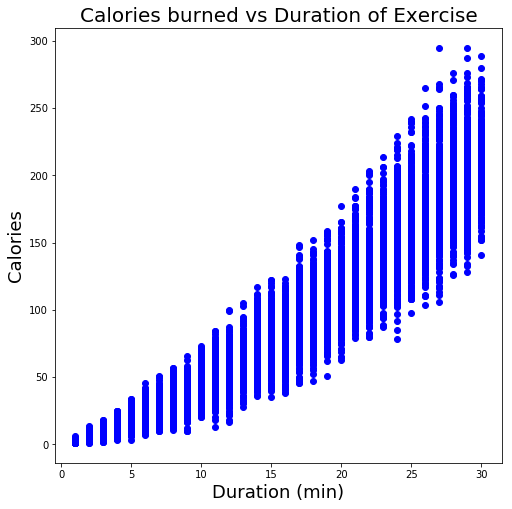

In [4]:
plt.figure(figsize=(8, 8))

plt.plot(df['Duration'], df['Calories'], 'bo');
plt.xlabel('Duration (min)', size = 18); plt.ylabel('Calories', size = 18); 
plt.title('Calories burned vs Duration of Exercise', size = 20);

In [5]:
# Create the features and response
X = df.loc[:, ['Intercept', 'Duration']]
y = df.ix[:, 'Calories']

/home/dhanya/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


In [6]:
# Takes a matrix of features (with intercept as first column) 
# and response vector and calculates linear regression coefficients
def linear_regression(X, y):
    # Equation for linear regression coefficients
    beta = np.matmul(np.matmul(np.linalg.inv(np.matmul(X.T, X)), X.T), y)
    return beta

In [7]:
# Run the by hand implementation
by_hand_coefs = linear_regression(X, y)
print('Intercept calculated by hand:', by_hand_coefs[0])
print('Slope calculated by hand: ', by_hand_coefs[1])

Intercept calculated by hand: -21.828102526050813
Slope calculated by hand:  7.169783349587851


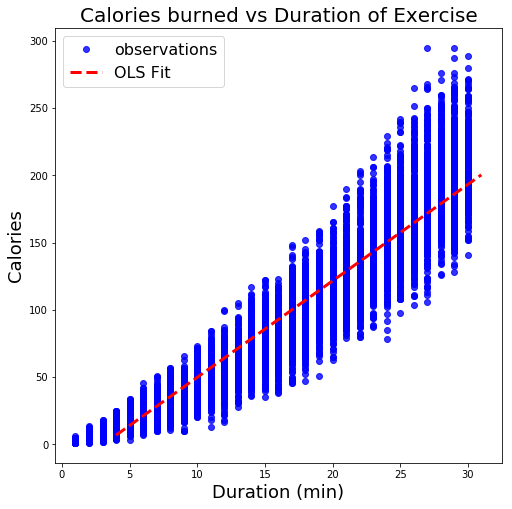

In [8]:
xs = np.linspace(4, 31, 1000)
ys = by_hand_coefs[0] + by_hand_coefs[1] * xs

plt.figure(figsize=(8, 8))
plt.plot(df['Duration'], df['Calories'], 'bo', label = 'observations', alpha = 0.8);
plt.xlabel('Duration (min)', size = 18); plt.ylabel('Calories', size = 18); 
plt.plot(xs, ys, 'r--', label = 'OLS Fit', linewidth = 3)
plt.legend(prop={'size': 16})
plt.title('Calories burned vs Duration of Exercise', size = 20);

In [9]:
print('Exercising for 15.5 minutes will burn an estimated {:.2f} calories.'.format(
    by_hand_coefs[0] + by_hand_coefs[1] * 15.5))

Exercising for 15.5 minutes will burn an estimated 89.30 calories.


In [10]:
#BLR with 500 observations
with pm.Model() as linear_model_500:
    # Intercept
    intercept = pm.Normal('Intercept', mu = 0, sd = 10)
    
    # Slope 
    slope = pm.Normal('slope', mu = 0, sd = 10)
    
    # Standard deviation
    sigma = pm.HalfNormal('sigma', sd = 10)
    
    # Estimate of mean
    mean = intercept + slope * X.loc[0:499, 'Duration']
    
    # Observed values
    Y_obs = pm.Normal('Y_obs', mu = mean, sd = sigma, observed = y.values[0:500])
    
    # Sampler
    step = pm.NUTS()

    # Posterior distribution
    linear_trace_500 = pm.sample(1000, step)

Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, slope, Intercept]
Sampling 4 chains: 100%|██████████| 6000/6000 [00:02<00:00, 2708.41draws/s]
The acceptance probability does not match the target. It is 0.9001154340174397, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.8834627022394597, but should be close to 0.8. Try to increase the number of tuning steps.


In [11]:
with pm.Model() as linear_model:
    # Intercept
    intercept = pm.Normal('Intercept', mu = 0, sd = 10)
    
    # Slope 
    slope = pm.Normal('slope', mu = 0, sd = 10)
    
    # Standard deviation
    sigma = pm.HalfNormal('sigma', sd = 10)
    
    # Estimate of mean
    mean = intercept + slope * X.loc[:, 'Duration']
    
    # Observed values
    Y_obs = pm.Normal('Y_obs', mu = mean, sd = sigma, observed = y.values)
    
    # Sampler
    step = pm.NUTS()

    # Posterior distribution
    linear_trace = pm.sample(1000, step)

Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, slope, Intercept]
Sampling 4 chains: 100%|██████████| 6000/6000 [00:07<00:00, 814.92draws/s] 
The acceptance probability does not match the target. It is 0.9453000651613087, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.93985645012977, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.9856750207638901, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.9570966805435139, but should be close to 0.8. Try to increase the number of tuning steps.


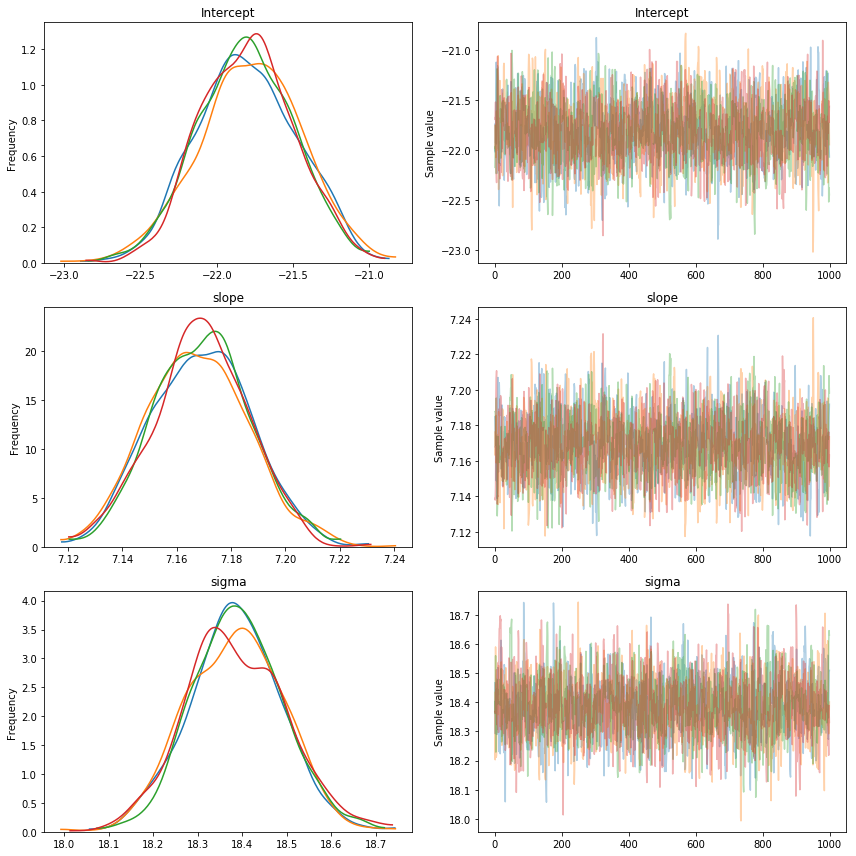

In [12]:
pm.traceplot(linear_trace, figsize = (12, 12));

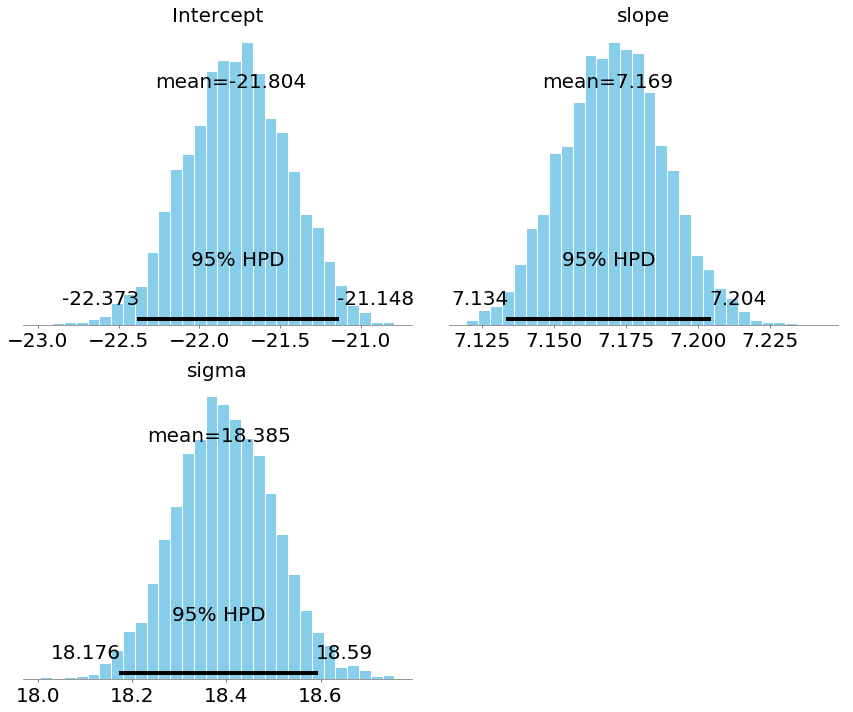

In [13]:
pm.plot_posterior(linear_trace, figsize = (12, 10), text_size = 20);

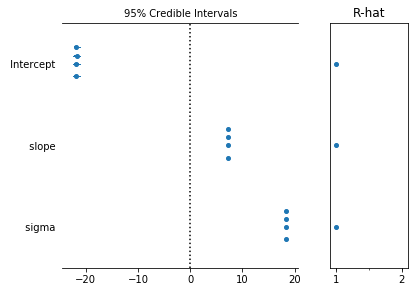

In [14]:
pm.forestplot(linear_trace);

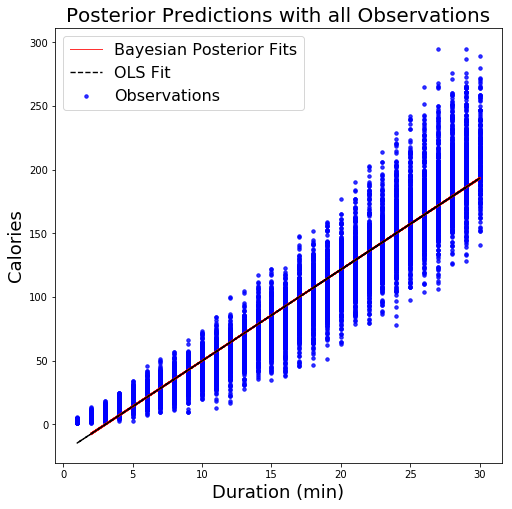

In [15]:
#Predictions
plt.figure(figsize = (8, 8))
pm.plot_posterior_predictive_glm(linear_trace, samples = 100, eval=np.linspace(2, 30, 100), linewidth = 1, 
                                 color = 'red', alpha = 0.8, label = 'Bayesian Posterior Fits',
                                lm = lambda x, sample: sample['Intercept'] + sample['slope'] * x);
plt.scatter(X['Duration'], y.values, s = 12, alpha = 0.8, c = 'blue', label = 'Observations')
plt.plot(X['Duration'], by_hand_coefs[0] + X['Duration'] * by_hand_coefs[1], 'k--', label = 'OLS Fit', linewidth = 1.4)
plt.title('Posterior Predictions with all Observations', size = 20); plt.xlabel('Duration (min)', size = 18);
plt.ylabel('Calories', size = 18);
plt.legend(prop={'size': 16});

In [16]:
pm.stats.summary(linear_trace)

,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
Intercept,-21.803807,0.319010,0.007532,-22.372663,-21.147645,1746.162195,1.000484
slope,7.168659,0.017957,0.000409,7.134092,7.203966,1835.114369,1.000307
sigma,18.384684,0.106104,0.002491,18.176283,18.590413,2031.374838,1.000121


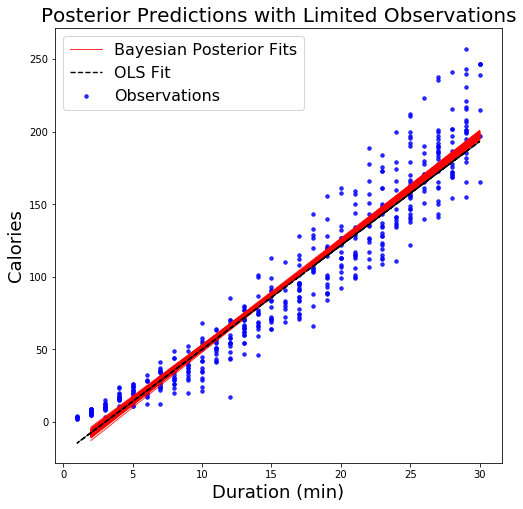

In [17]:
#Limited Observation
plt.figure(figsize = (8, 8))
pm.plot_posterior_predictive_glm(linear_trace_500, samples = 100, eval=np.linspace(2, 30, 100), linewidth = 1, 
                                 color = 'red', alpha = 0.8, label = 'Bayesian Posterior Fits',
                                lm = lambda x, sample: sample['Intercept'] + sample['slope'] * x);
plt.scatter(X['Duration'][:500], y.values[:500], s = 12, alpha = 0.8, c = 'blue', label = 'Observations')
plt.plot(X['Duration'], by_hand_coefs[0] + X['Duration'] * by_hand_coefs[1], 'k--', label = 'OLS Fit', linewidth = 1.4)
plt.title('Posterior Predictions with Limited Observations', size = 20); plt.xlabel('Duration (min)', size = 18);
plt.ylabel('Calories', size = 18);
plt.legend(prop={'size': 16});

In [18]:
pm.stats.summary(linear_trace_500)

,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
Intercept,-22.810328,1.775334,0.044702,-26.020765,-19.009687,1754.590638,1.000562
slope,7.354672,0.098010,0.002502,7.169006,7.549754,1754.052229,1.000157
sigma,18.200551,0.589529,0.012508,17.095328,19.392885,2310.987042,0.999807


In [19]:
#Specific Prediction for One Datapoint
bayes_prediction = linear_trace['Intercept'] + linear_trace['slope'] * 15.5

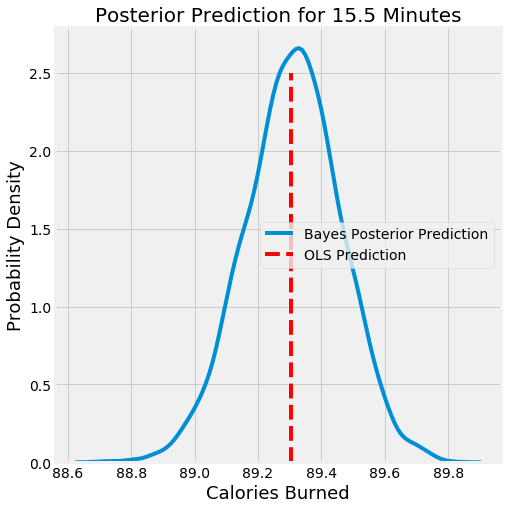

In [20]:
plt.figure(figsize = (8, 8))
plt.style.use('fivethirtyeight')
sns.kdeplot(bayes_prediction, label = 'Bayes Posterior Prediction')
plt.vlines(x = by_hand_coefs[0] + by_hand_coefs[1] * 15.5, 
           ymin = 0, ymax = 2.5, 
           label = 'OLS Prediction',
          colors = 'red', linestyles='--')
plt.legend();
plt.xlabel('Calories Burned', size = 18), plt.ylabel('Probability Density', size = 18);
plt.title('Posterior Prediction for 15.5 Minutes', size = 20);